In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def line(x, k, b):
    return x*k + b

In [4]:
df = pd.read_csv(r"raw-data/discharge.txt")
U = df['U']*10
I = df['I']*6/155

In [5]:
I_line = I[:8]
U_line = U[:8]
opt, cov = curve_fit(line, U_line, I_line)

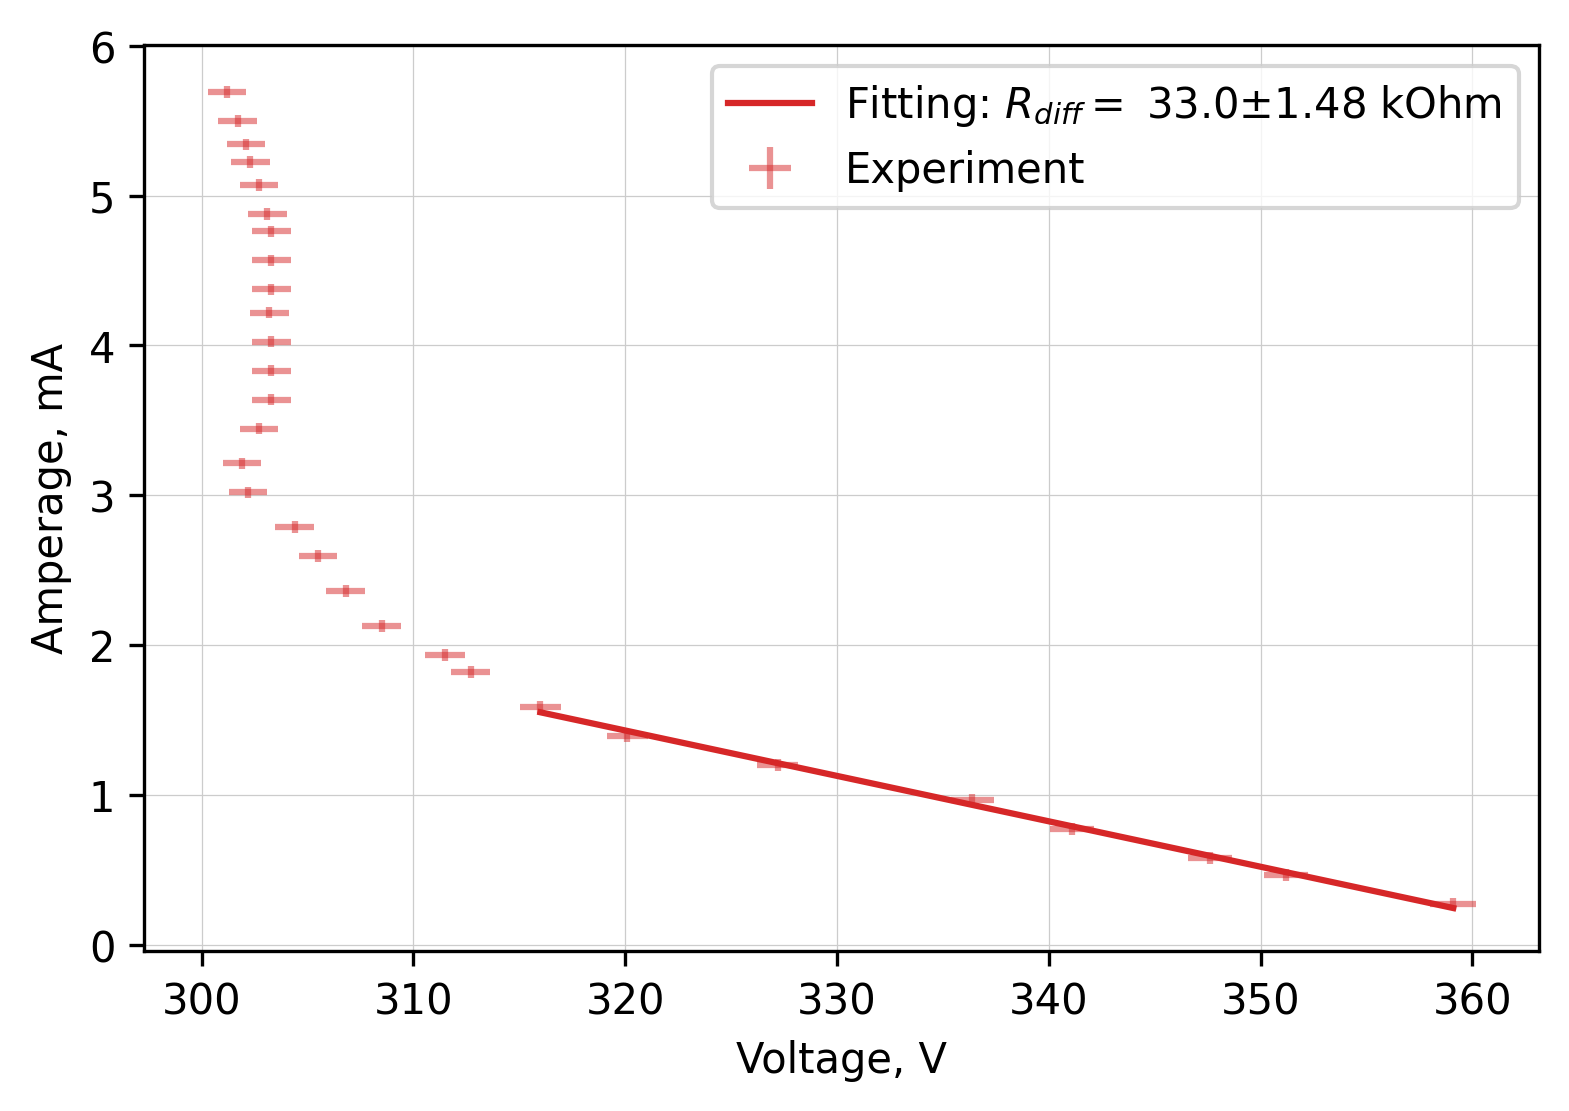

In [6]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

plt.errorbar(U, I, yerr=6/155, xerr=0.003*U, linestyle='', marker='.', markersize=0, label="Experiment", color="tab:red", alpha=0.5)
plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, mA")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-discharge.png", facecolor="white")
plt.show()

**Кривая соответствует участку ГД** -- поднормальный тлеющий разряд

In [7]:
pr = []
pr.append(pd.read_csv(r"raw-data\probe5.txt"))
pr.append(pd.read_csv(r"raw-data\probe3.txt"))
pr.append(pd.read_csv(r"raw-data\probe1-5.txt"))

I_name = [5, 3, 1.5]
colors = ["orange", "green", "blue"]
I_corr = [5.65, 4.16, 2.25]

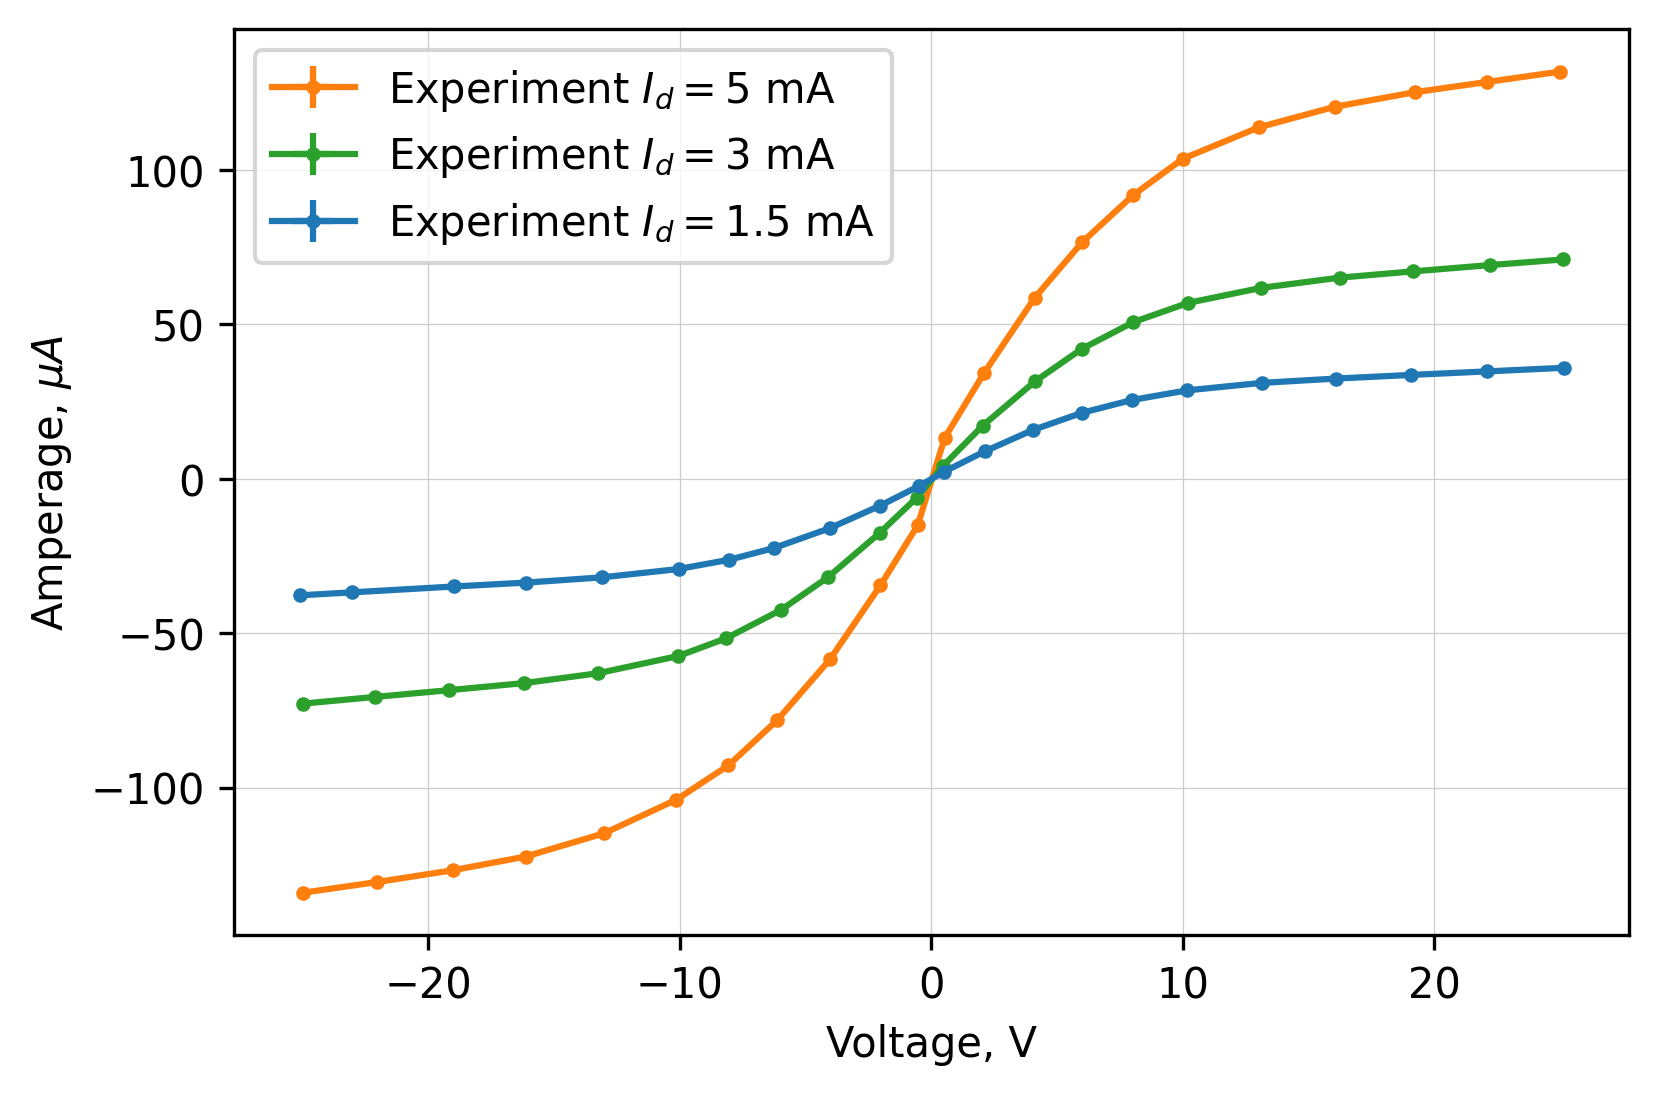

In [8]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

for index, probe in enumerate(pr):
    U = probe['U']
    I = probe['I'] + I_corr[index]
    plt.errorbar(U, I, yerr=0.003*I, xerr=0.003*U, linestyle='-', marker='.', markersize=5, label=r"Experiment $I_d = $" + f"{I_name[index]}" +" mA", color=f"tab:{colors[index]}", alpha=1)
# plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, $\mu A$")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-probe.png", facecolor="white")
plt.show()

In [9]:
I_in = []
dIdU = []

I_plus_5 = 95.8328	 I_minus_5 = -95.9134
I_plus_3 = 52.4716	 I_minus_3 = -52.5127
I_plus_1.5 = 25.8552	 I_minus_1.5 = -25.8095


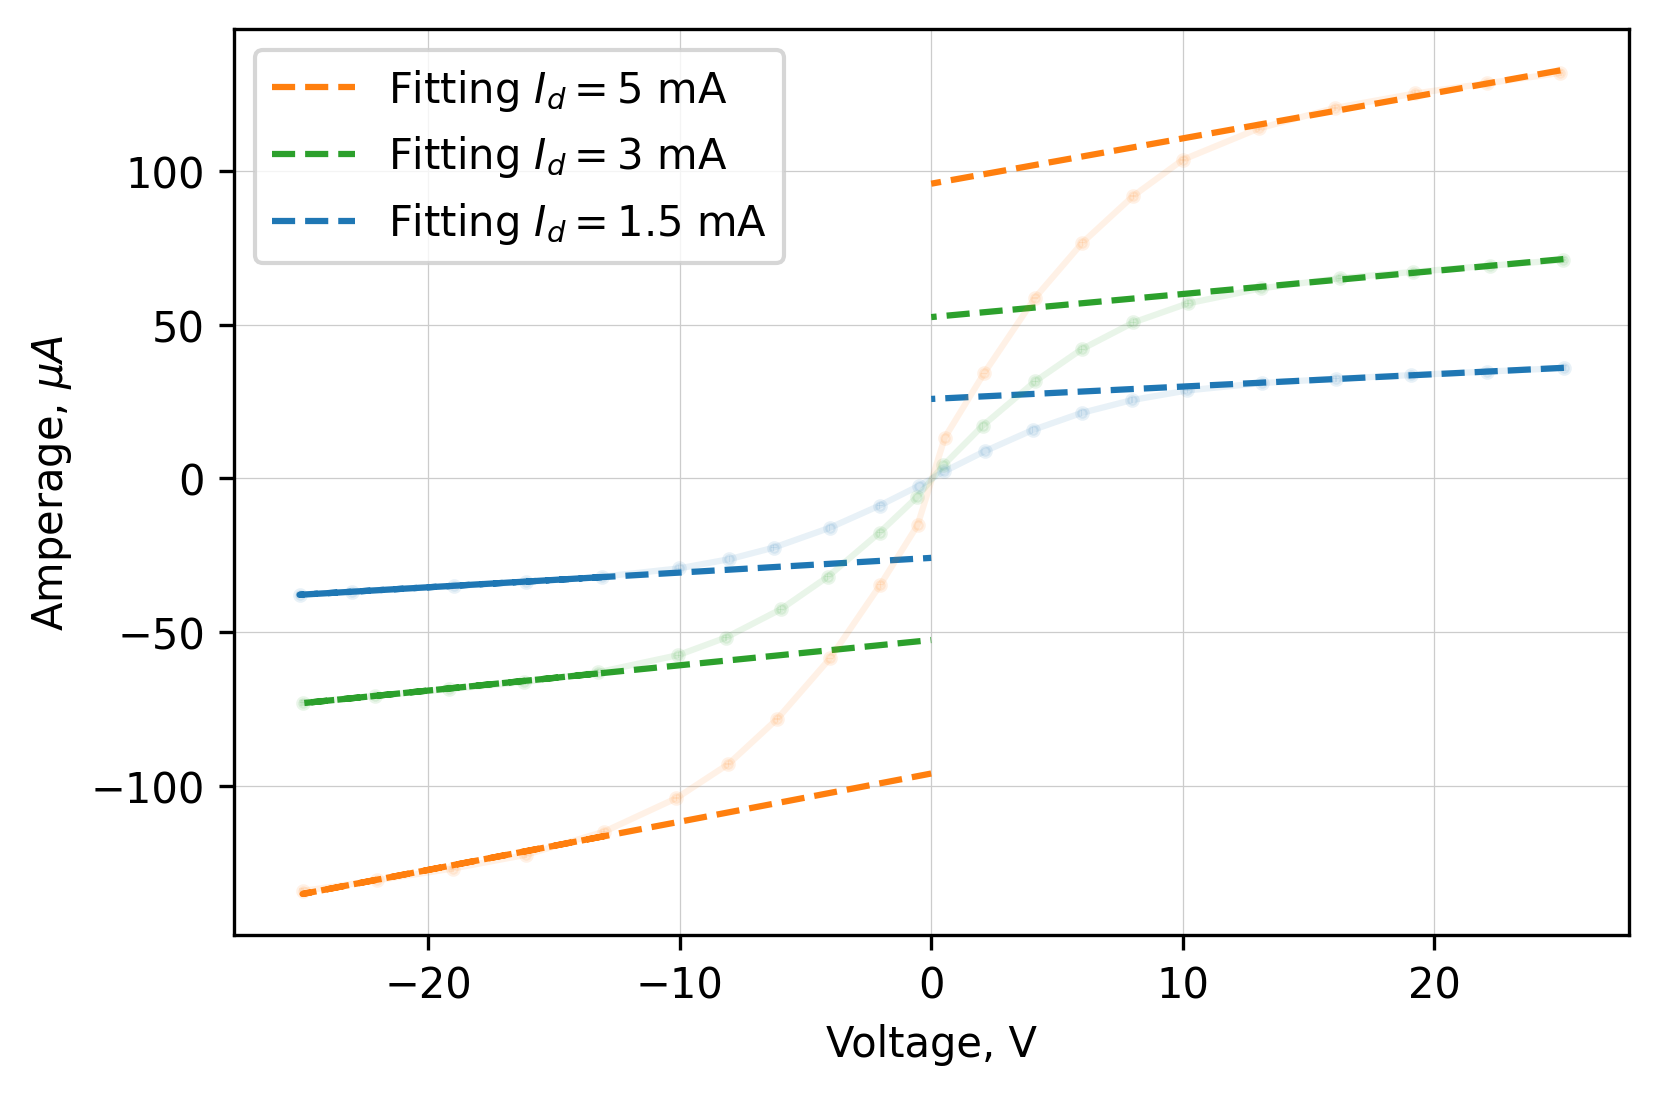

In [10]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

for index, probe in enumerate(pr):
    U = probe['U']
    I = probe['I'] + I_corr[index]
    plt.errorbar(U, I, yerr=0.003*I, xerr=0.003*U, linestyle='-', marker='.', markersize=5, alpha=0.1, color=f"tab:{colors[index]}")
    
    U_plus = np.concatenate([U[:5], [0]])
    U_minus = np.concatenate([U[-5:], [0]])
    
    ptr_plus, _ = curve_fit(line, U[:5], I[:5])
    ptr_minus, _ = curve_fit(line, U[-5:], I[-5:])
    
    plt.plot(U_plus, line(U_plus, ptr_plus[0], ptr_plus[1]), color=f"tab:{colors[index]}", linestyle='--', label=r"Fitting $I_d = $" + f"{I_name[index]}" +" mA")
    plt.plot(U_minus, line(U_minus, ptr_minus[0], ptr_minus[1]), color=f"tab:{colors[index]}", linestyle='--')
    
    print(f"I_plus_{I_name[index]} = {line(0, ptr_plus[0], ptr_plus[1]):.4f}\t I_minus_{I_name[index]} = {line(0, ptr_minus[0], ptr_minus[1]):.4f}")

    I_in.append(line(0, ptr_plus[0], ptr_plus[1]) * 1e-6)
    dIdU.append((I[11] - I[10]) / (U[11] - U[10]) * 1e-6)
    
# plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, $\mu A$")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-probe-fit.png", facecolor="white")
plt.show()

In [11]:
I_in = np.array(I_in)
dIdU = np.array(dIdU)

In [12]:
e = 1.6e-19
me = 9.1e-31
k = 1.38e-23
kTe = 0.5 * e * I_in / dIdU

In [13]:
dU = 2 * kTe / e
T = 11800 * dU

In [14]:
T

array([42973.01960467, 62783.49451912, 65561.29135539])

In [15]:
kTe / e

array([1.82089066, 2.66031756, 2.77802082])

11. Концентрация электронов

In [16]:
d=0.2e-3
l=5.2e-3
n_e = 2.5 * I_in / (e * 3.14 * l * d * np.sqrt((2 * kTe) / (22*1.66e-27)))

In [17]:
n_e

array([1.14794130e+17, 5.20001953e+16, 2.50742641e+16])

12. Плазменная частота колебаний электронов

In [18]:
w_p = np.sqrt((4*np.pi * e**2) / me) * np.sqrt(n_e)

In [19]:
w_p

array([201448.50999052, 135583.45788038,  94149.5646552 ])

In [20]:
rDe = np.sqrt(kTe / (4*np.pi*(e**2)*n_e))

In [21]:
rDe

array([2.80877642, 5.04428168, 7.42315839])

In [22]:
rD = np.sqrt(k * 300 / (4*np.pi*(e**2)*n_e))

In [31]:
rD

array([0.3348231 , 0.49747673, 0.71640921])

In [24]:
ND = 4/3 * np.pi * (rD)**3 * n_e

In [25]:
ND

array([1.80490578e+16, 2.68171048e+16, 3.86189338e+16])

In [26]:
alpha = n_e / (266.6 / (300 * k))

In [27]:
alpha

array([1.78262453e-06, 8.07504908e-07, 3.89375294e-07])